# what is oulires

In [ ]:
## if the model is work in the weights then the outliers effects the model 

In [2]:
## how to treate the outliers 
# triming    2.Capping (create a limit that there out of these boundary all the data are the outliers ) 3 are ssuming the outliers as a missing value 


In [ ]:
#methodas to identify the outliers  
# 1. normal distribution 
#2. Skewed distribution (IQR method is used )
# other distribution 


### techinque for detection  

In [ ]:
# z-score
# IQR filltering  
#  percentile 
# winsherization 

## Z-Score method 

In [ ]:
## it should be normally distributed 
# minimu = u-3sigma     and  maximum =u+3sigma   u = mean  , sigma  = standard devation \


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv('placement.csv')

In [5]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


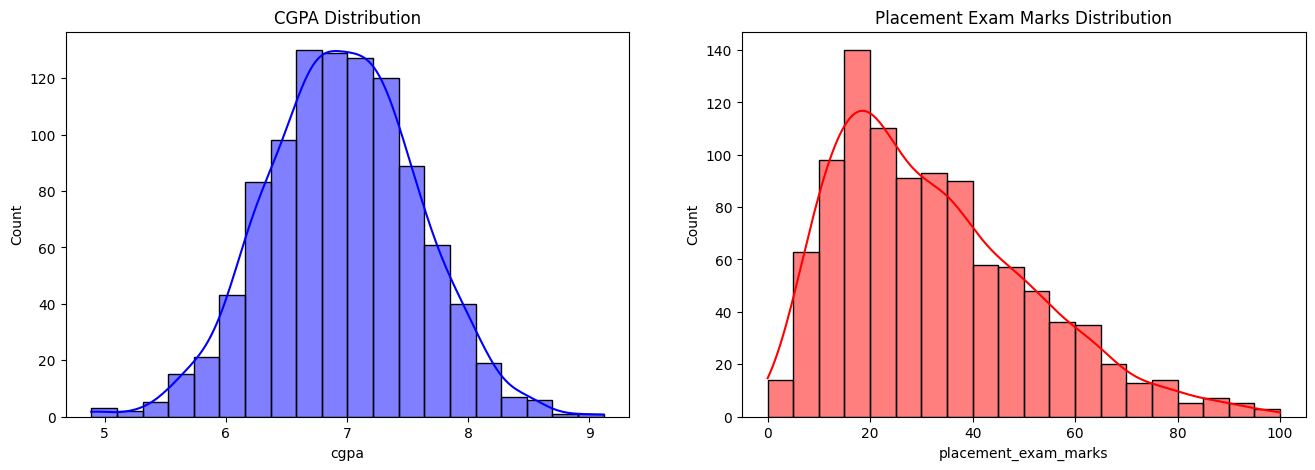

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True, color='blue', bins=20)
plt.title('CGPA Distribution')

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True, color='red', bins=20)
plt.title('Placement Exam Marks Distribution')

plt.show()


In [15]:
print('mean',df['cgpa'].mean())
print('std',df['cgpa'].std())
print('min',df['cgpa'].min())
print('max',df['cgpa'].max())


mean 6.96124
std 0.6158978751323896
min 4.89
max 9.12


In [16]:
print('highest allowed ',df['cgpa'].mean()+ 3*df['cgpa'].std())
print('Lowest allowed ',df['cgpa'].mean() -  3*df['cgpa'].std())


highest allowed  8.808933625397168
Lowest allowed  5.113546374602832


In [18]:
## findoutliers 
df[(df['cgpa']>8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [20]:
new_df = df[(df['cgpa']>8.80) | (df['cgpa'] < 5.11)]
new_df

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [23]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [24]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [25]:
df[df['cgpa_zscore']< -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [26]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [29]:
new_df = df[(df['cgpa_zscore'] < 3)& (df['cgpa_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


##  Capping 

In [30]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()


In [31]:
upper_limit

8.808933625397168

In [32]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit, # if the value is grater th upper limit then replace it by upper limit  
    np.where(
        df['cgpa']<lower_limit,lower_limit,
        df['cgpa'] # if both conditions are false then dont change the value 
    )
)

In [35]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# IQR method  for handling outliers 

In [69]:
df = pd.read_csv('placement.csv')

/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


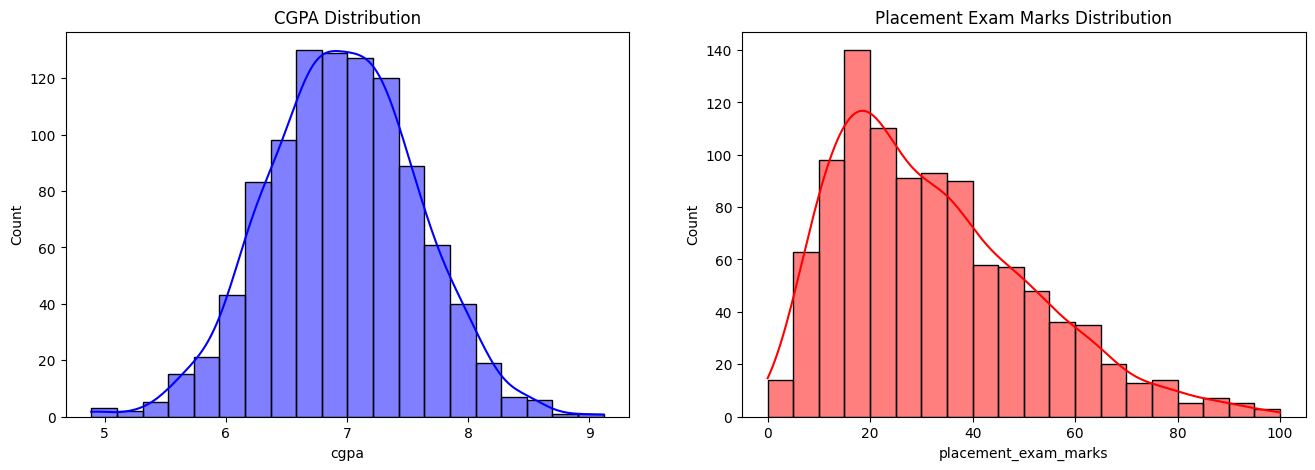

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True, color='blue', bins=20)
plt.title('CGPA Distribution')

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True, color='red', bins=20)
plt.title('Placement Exam Marks Distribution')

plt.show()


In [38]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

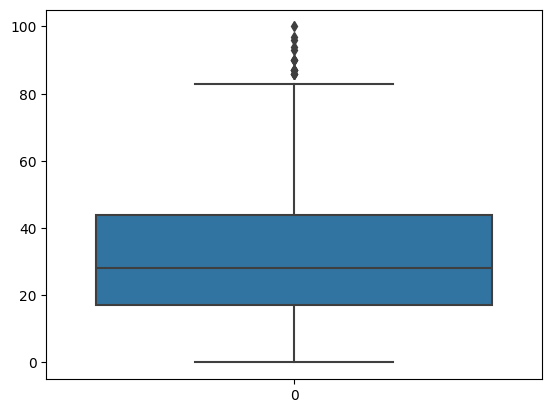

In [43]:
sns.boxplot(df['placement_exam_marks'])

In [44]:
## finding the IQR 
perc25th = df['placement_exam_marks'].quantile(0.25)
perc75th = df['placement_exam_marks'].quantile(0.75)


In [48]:
perc25th

17.0

In [49]:
perc75th

44.0

In [50]:
iqr = perc75th -perc25th

In [51]:
iqr

27.0

In [52]:
upper_limit = perc75th + 1.5* iqr 
lower_limit = perc25th  - 1.5* iqr 


In [53]:
upper_limit

84.5

In [54]:
lower_limit

-23.5

In [55]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [70]:
df[df['placement_exam_marks'] < lower_limit]


,cgpa,placement_exam_marks,placed


## triming 

In [71]:
new_df = df[df['placement_exam_marks'] <upper_limit]

In [72]:
new_df.shape

(985, 3)

/tmp/ipykernel_4682/2321792707.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_4682/2321792707.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functio

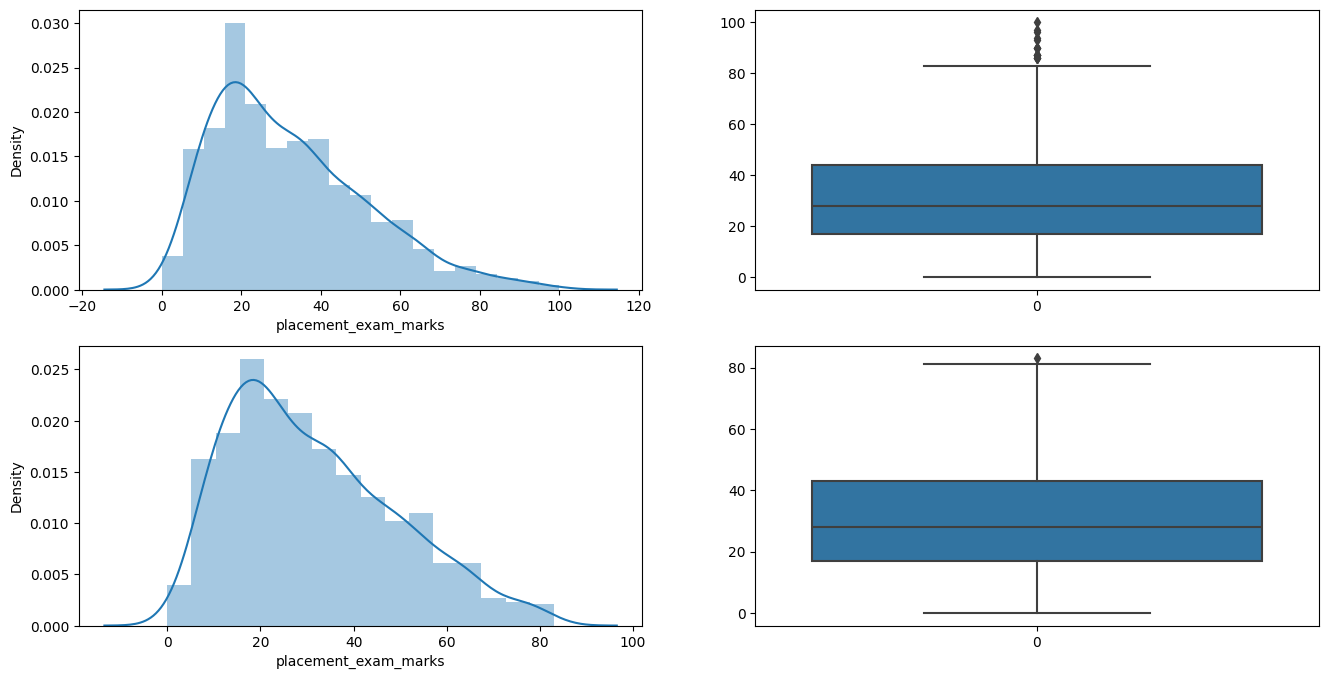

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()


In [73]:
new_df_cp = df.copy()
new_df_cp['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>upper_limit,
    upper_limit, # if the value is grater th upper limit then replace it by upper limit  
    np.where(
        new_df_cp['placement_exam_marks']< lower_limit,lower_limit,
        new_df_cp['placement_exam_marks'] # if both conditions are false then dont change the value 
    )
)

In [66]:
df.shape

(1000, 3)

## Winsorization 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df['Height'].describe()


count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

/tmp/ipykernel_4671/3304290084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

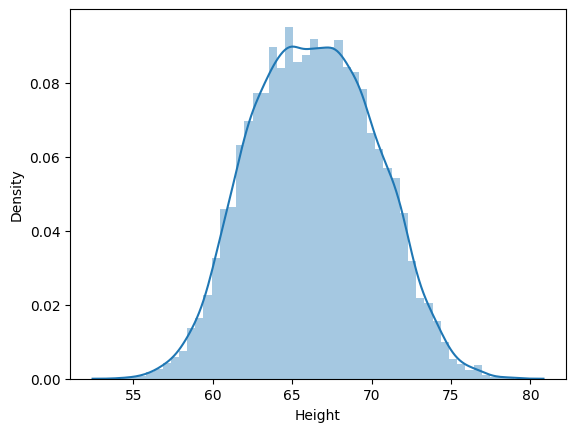

In [9]:
import seaborn as sns 
sns.distplot(df['Height'])


<Axes: >

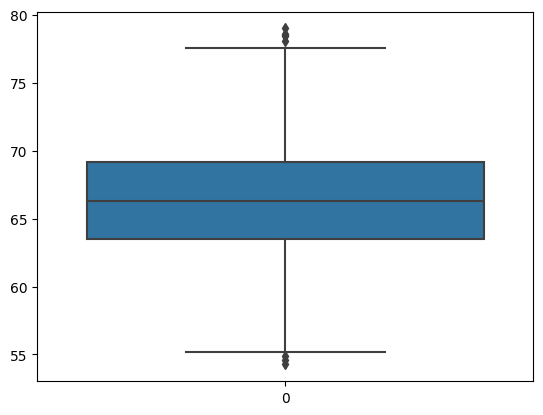

In [8]:
sns.boxplot(df['Height'])



In [10]:
upper_limit = df['Height'].quantile(0.99)

In [12]:
upper_limit

74.7857900583366

In [14]:
lower_limit = df['Height'].quantile(0.01)

In [15]:
lower_limit

58.13441158671655

In [18]:
df[(df['Height'] >= 74.78) | (df['Height'] <= 58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [22]:
new_df =  df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]


In [23]:
new_df.shape

(9799, 3)

In [25]:
new_df['Height'].describe()  

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

/tmp/ipykernel_4671/1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])
/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

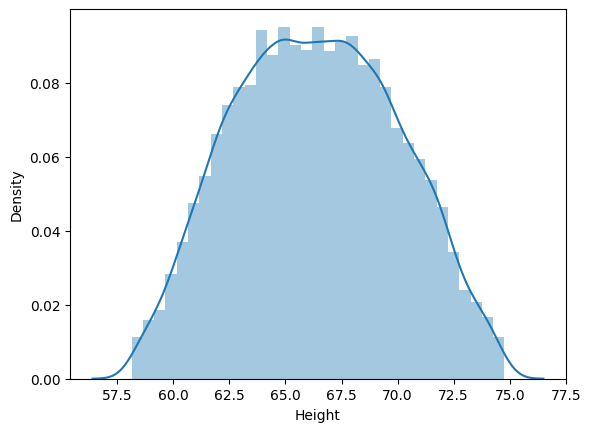

In [26]:
sns.distplot(new_df['Height'])

<Axes: >

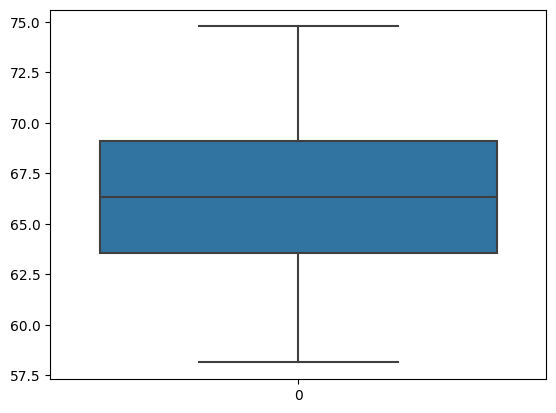

In [27]:
sns.boxplot(new_df['Height'])

## capping 

In [31]:
df ['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,lower_limit,
        df['Height']))

In [33]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


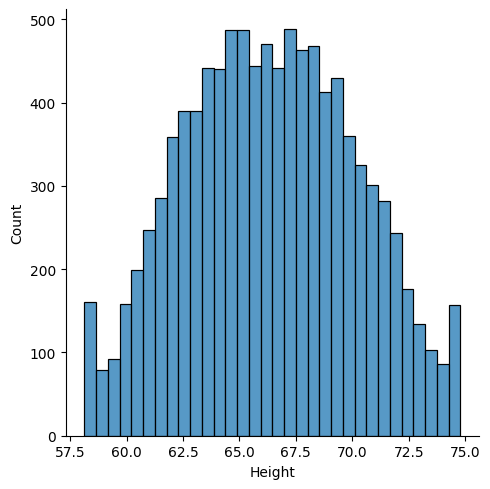

In [34]:
sns.displot(df['Height'])